In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn import metrics

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
N_SEED = 19
TOP_K = 5
VERBOSE = 1
N_JOBS = 4
TEST_RATIO = 0.3
COLOR_MAP = "RdYlBu"
L_FONT = {
    "color": "darkblue",
    "size": 11
}
T_COLOR = "darkred"

np.random.seed(N_SEED)

In [3]:
dataset = pd.read_csv("../data/creditcard.csv")

## EDA

In [4]:
dataset.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
dataset.isnull().values.sum()

np.int64(0)

In [8]:
def show_corr(features, target):
    plt.figure(figsize=(19, 15))
    features.corrwith(target).plot.bar(color="purple", grid=True)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def show_corr_heatmap(data):
    corr = data.corr() * 100
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr, annot=True, cmap=COLOR_MAP, fmt=".2f")
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_features(x, target):
    _, col = x.shape
    for i in range(col):
        plt.hist(x[:, i], color="green")
        plt.xlabel("X: {i}".format(i=i), fontdict=L_FONT)
        plt.ylabel("Population", fontdict=L_FONT)
        ax = plt.gca()
        ax.spines["bottom"].set_color(T_COLOR)
        ax.spines["top"].set_color(None)
        ax.spines["left"].set_color(T_COLOR)
        ax.spines["right"].set_color(None)
        ax.tick_params(axis="x", colors=T_COLOR)
        ax.tick_params(axis="y", colors=T_COLOR)
        plt.show();


def plot_class_dist(target):
    unique, counts = np.unique(target, return_counts=True)
    plt.bar(unique, counts, color="darkblue",)
    plt.xlabel("Class", fontdict=L_FONT)
    plt.ylabel("Population", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_xticks(ticks=unique, labels=unique)
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color="#1ecbe1", label="AUC = %0.4f" % roc_auc,)
    plt.legend(loc = "lower right")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel("TPR", fontdict=L_FONT)
    plt.xlabel("FPR", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_title("Receiver Operating Characteristic", fontdict={"color": "darkblue"})
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_classification(y_true, y_pred):
    precision, recall, f1, support = metrics.precision_recall_fscore_support(y_true, y_pred)
    sns.heatmap(
        (precision*100, recall*100, f1*100),
        annot=True, cmap=COLOR_MAP,
        fmt=".4f",
        yticklabels=("precision", "recall", "f1")
    )
    ax = plt.gca()
    ax.set_title("Classification Report", fontdict=L_FONT)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();

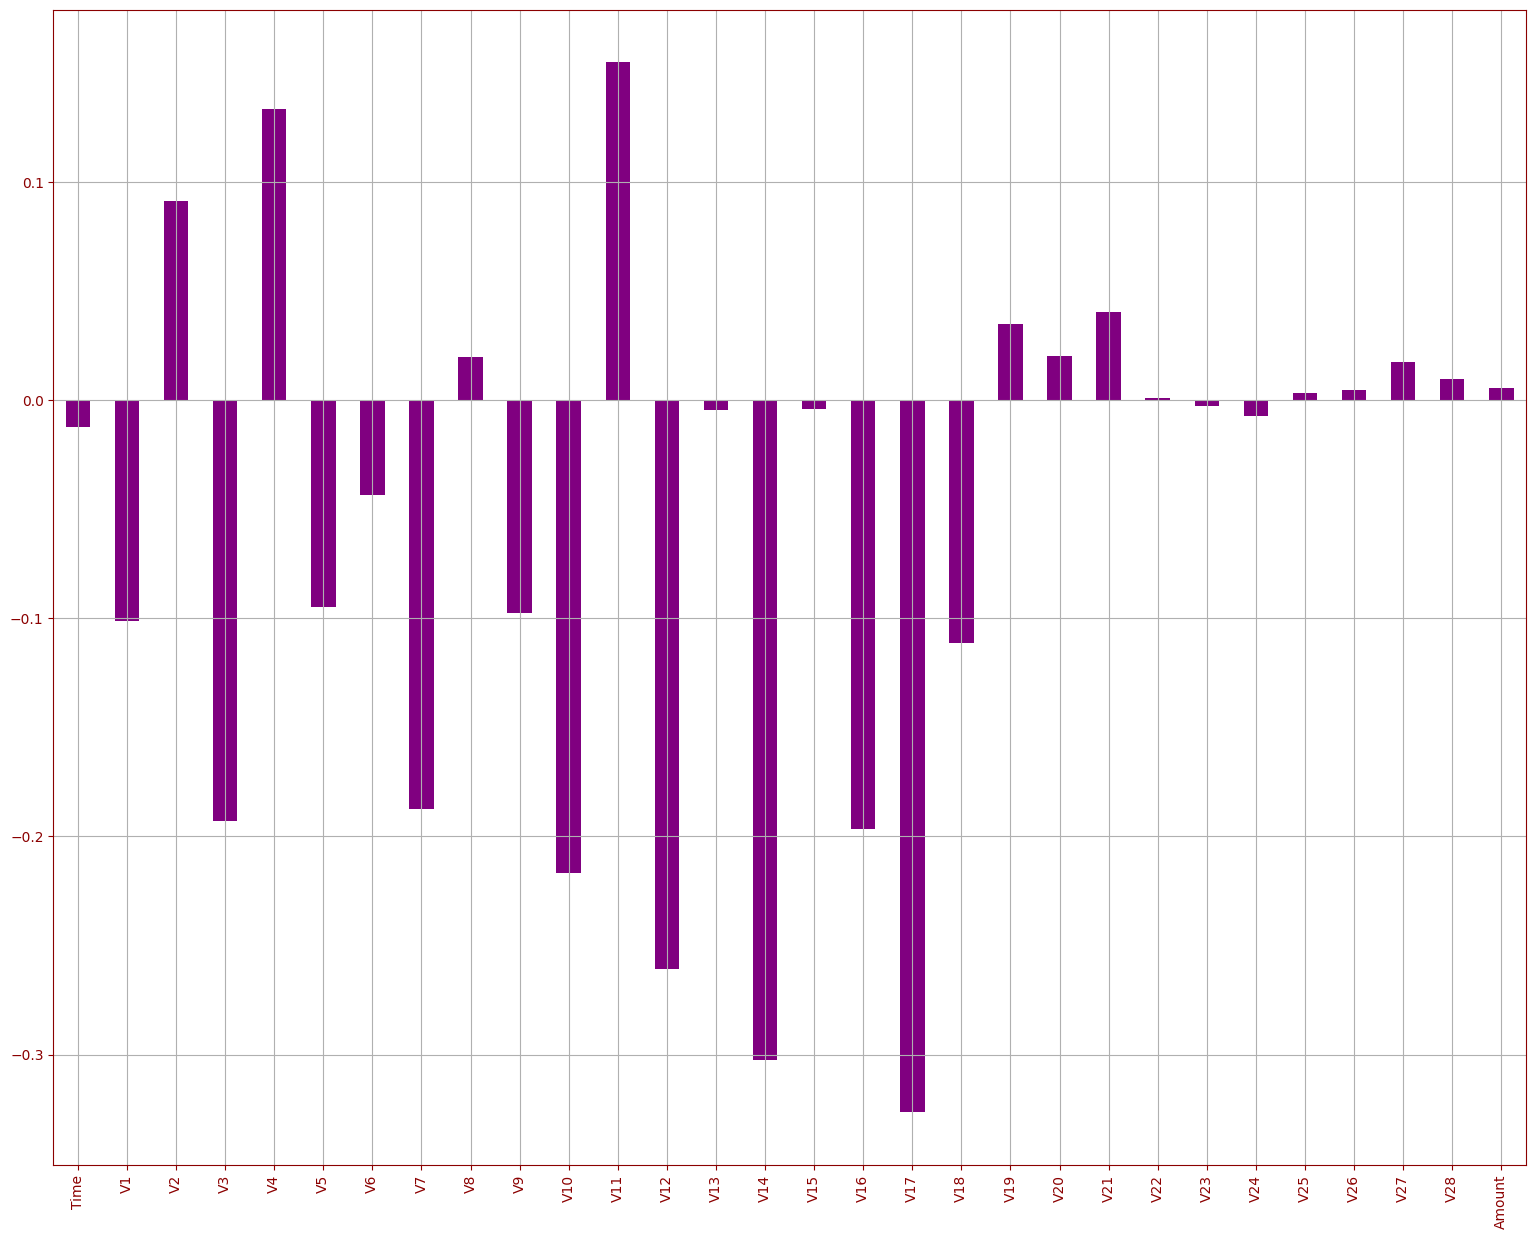

In [9]:
X_df = dataset.drop(columns=["Class"], axis=1)
y_df = dataset["Class"]
show_corr(X_df, y_df)

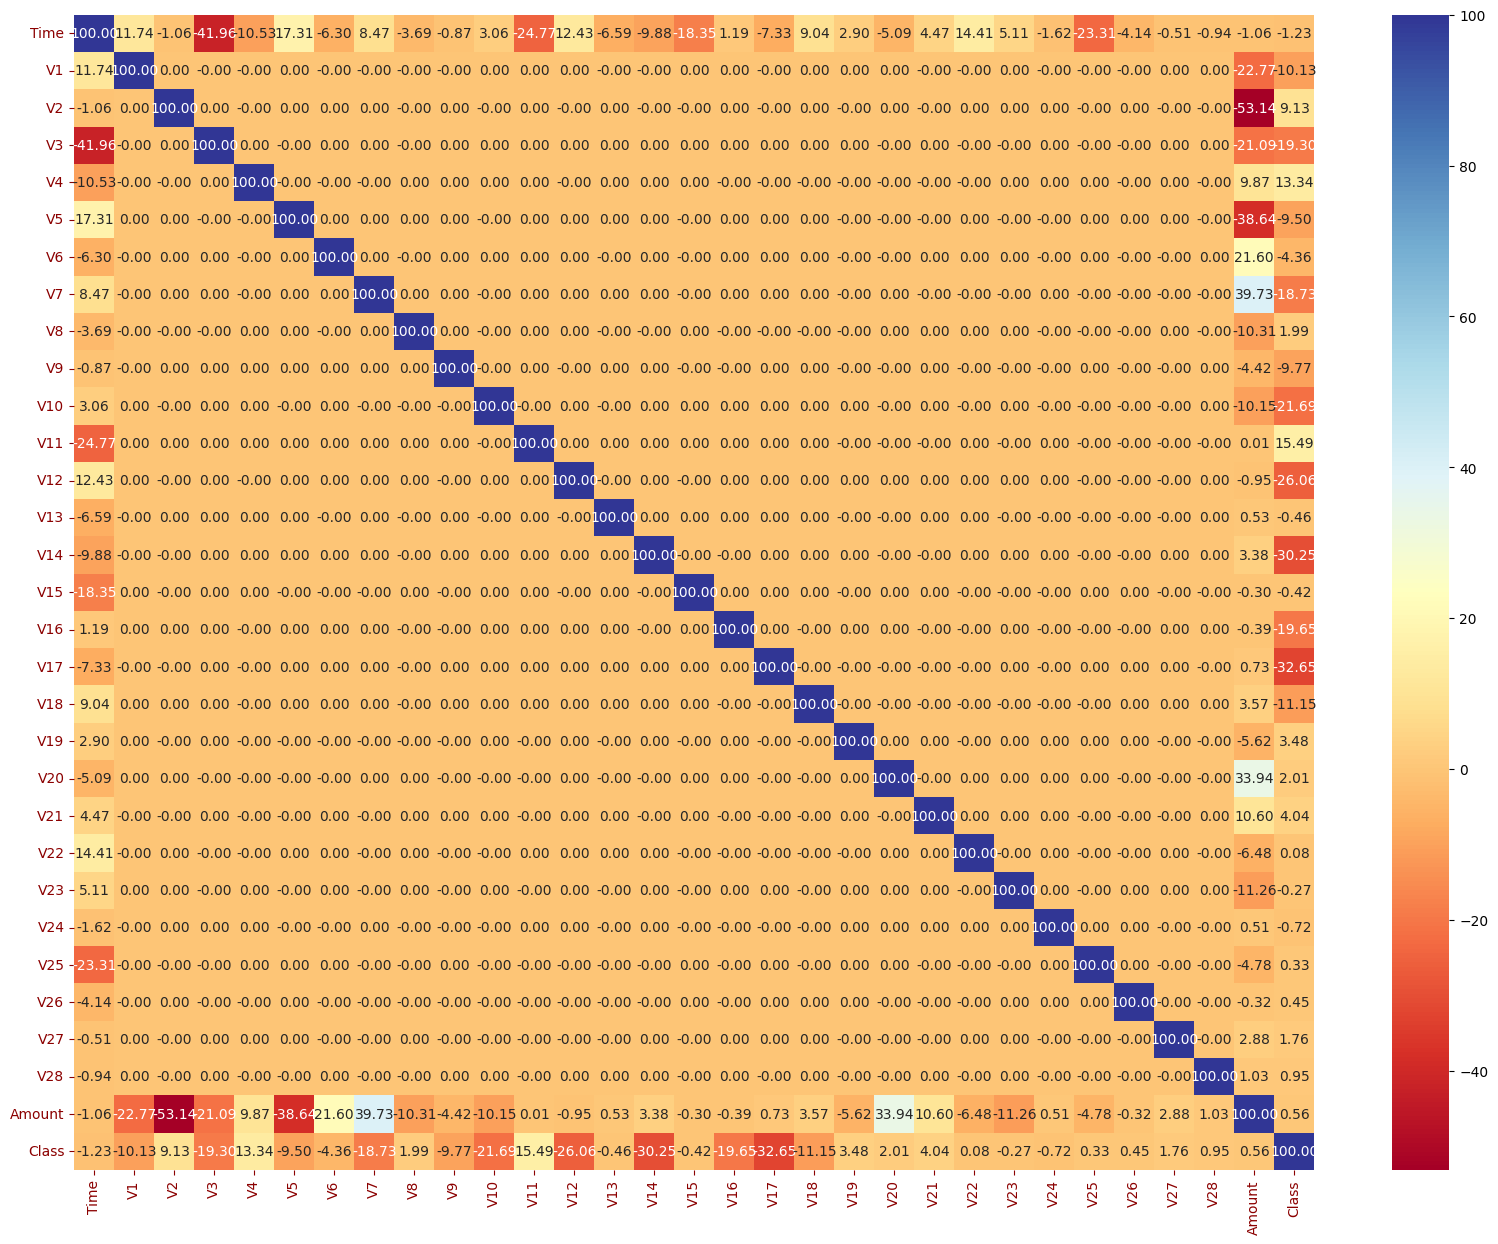

In [10]:
show_corr_heatmap(dataset)

In [11]:
X = np.array(X_df)
y = np.array(y_df).reshape(-1, 1)

In [12]:
# Scale data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [13]:
_, counts = np.unique(y, return_counts=True)
class_ratio = counts[0]/counts[1]
class_ratio

np.float64(577.8760162601626)

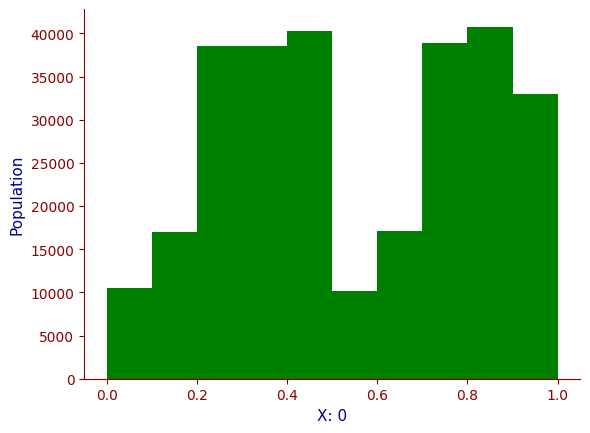

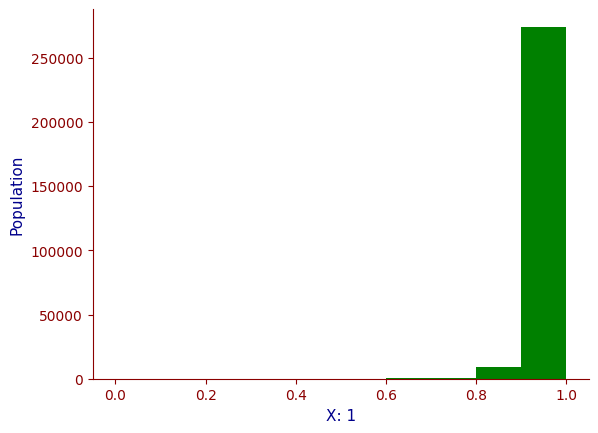

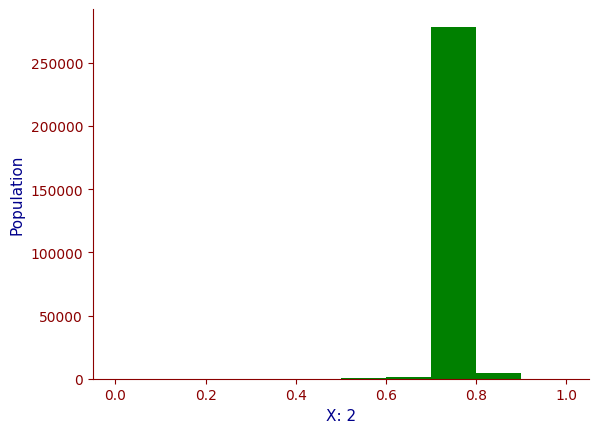

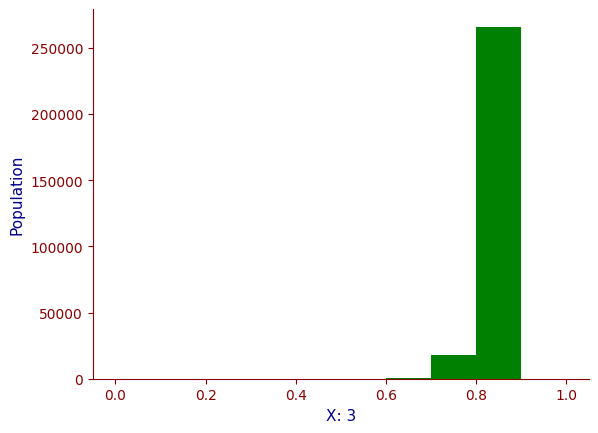

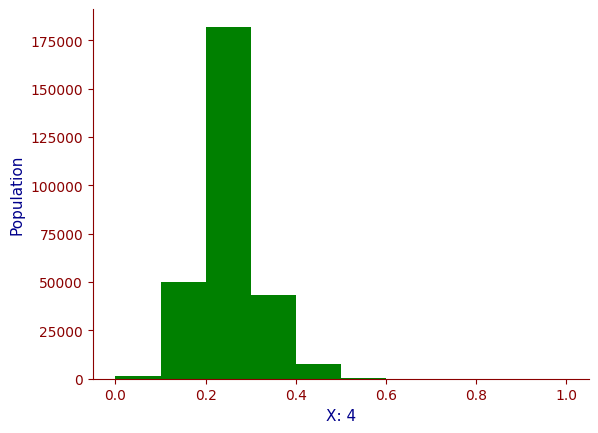

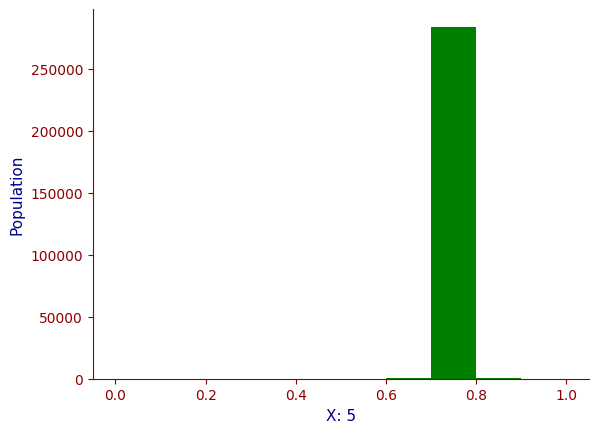

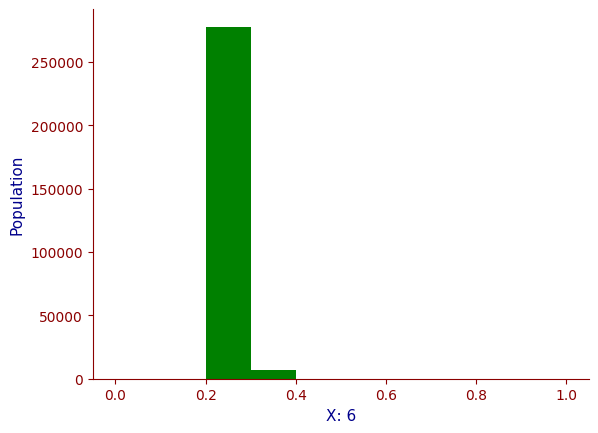

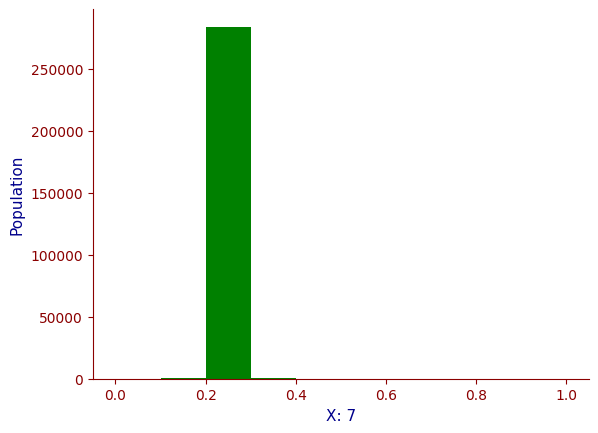

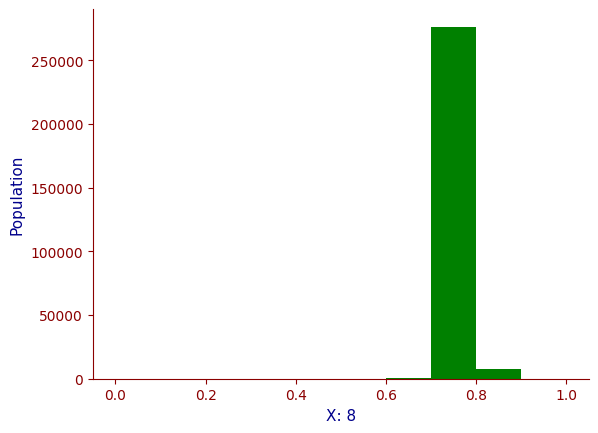

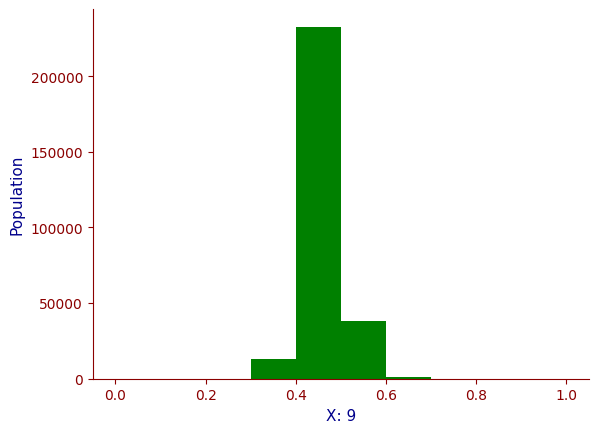

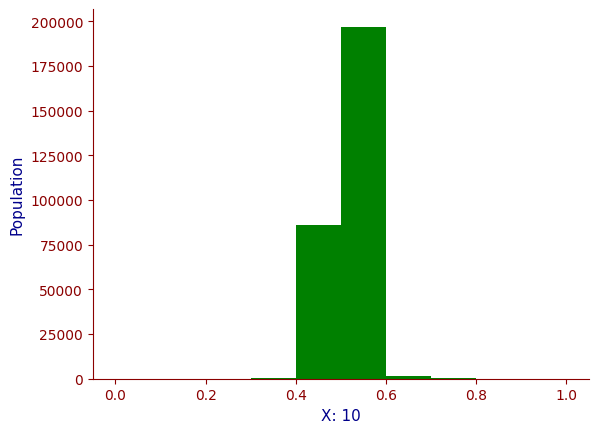

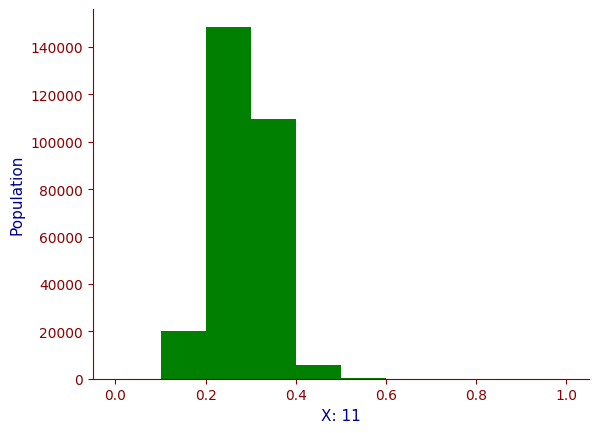

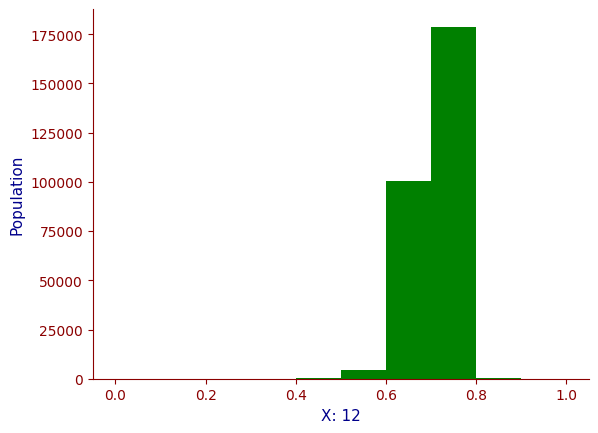

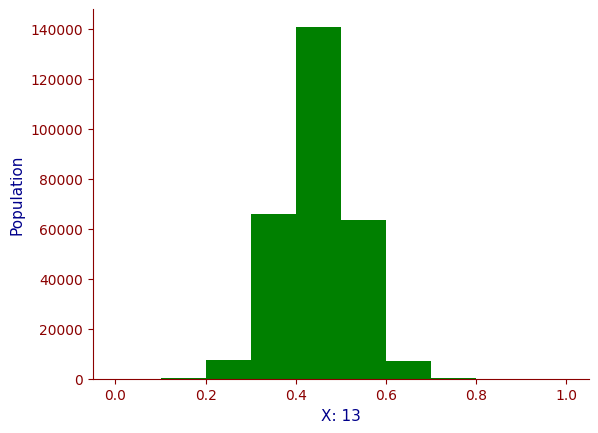

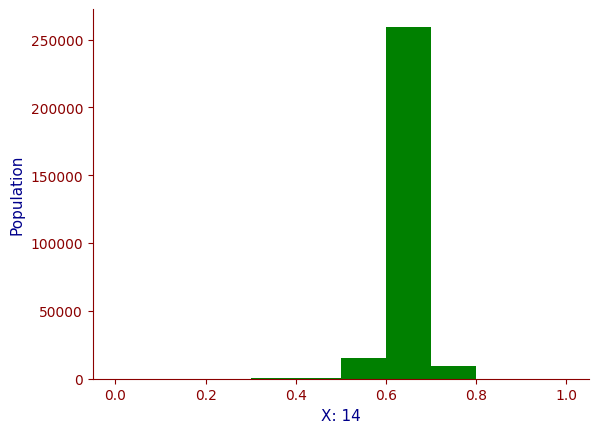

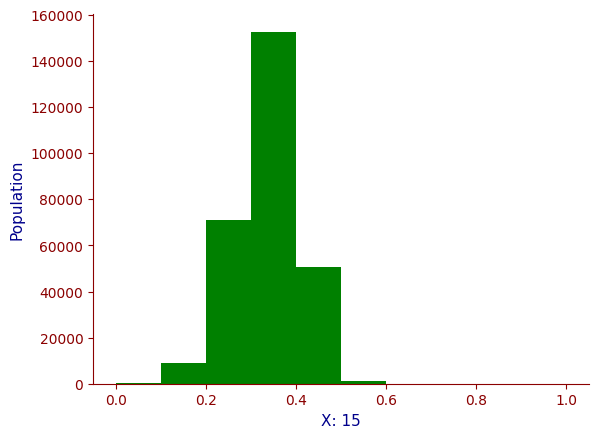

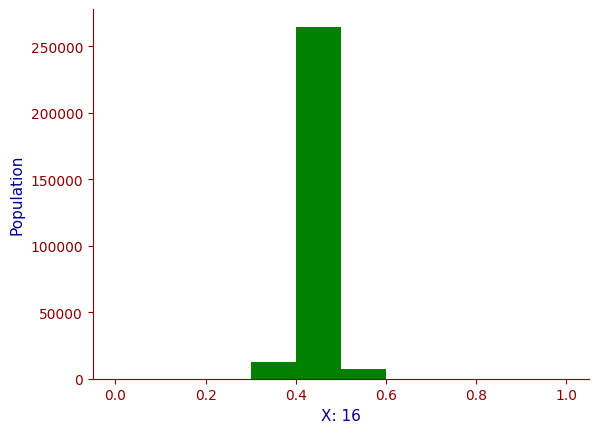

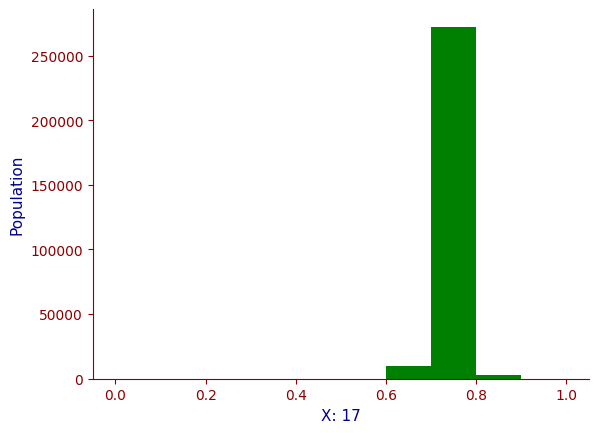

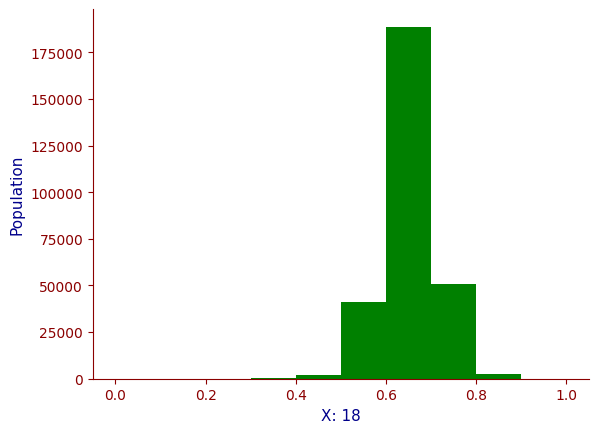

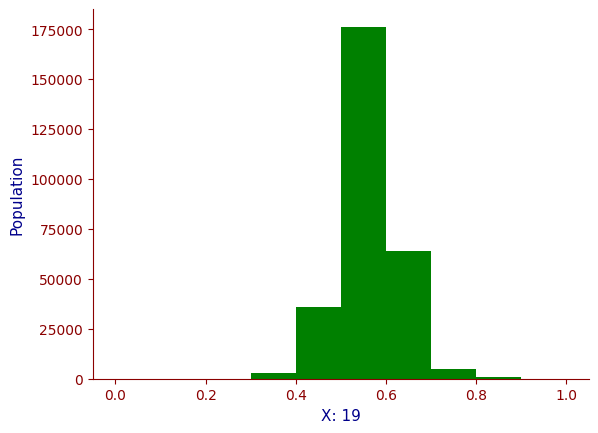

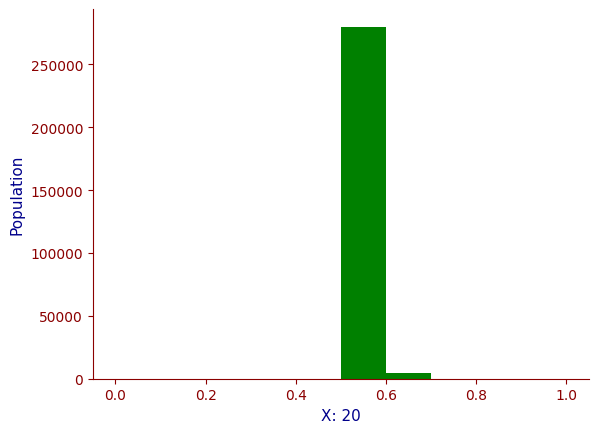

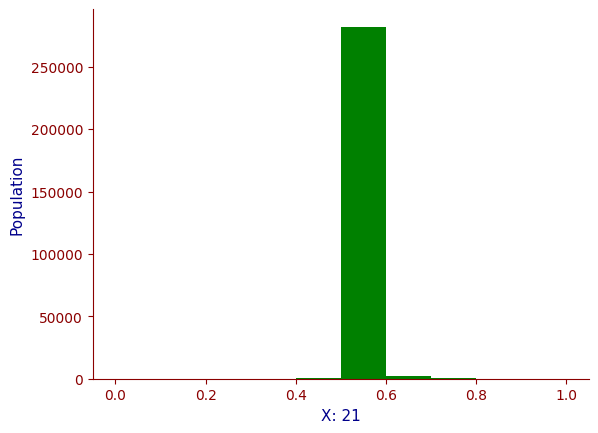

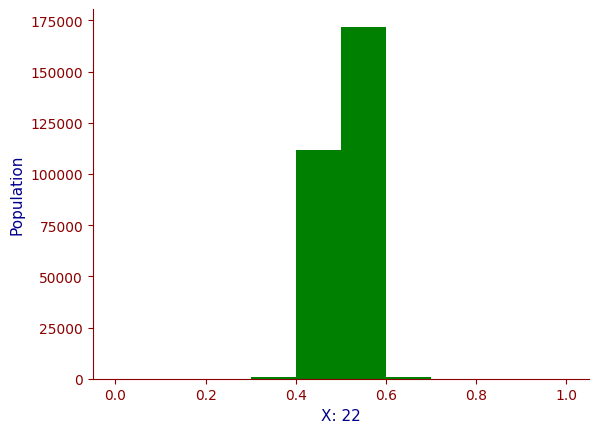

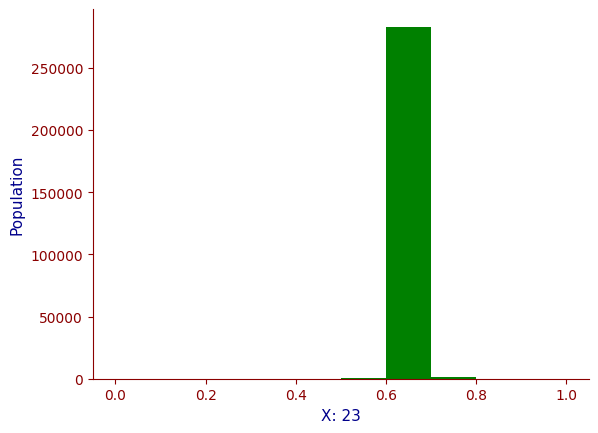

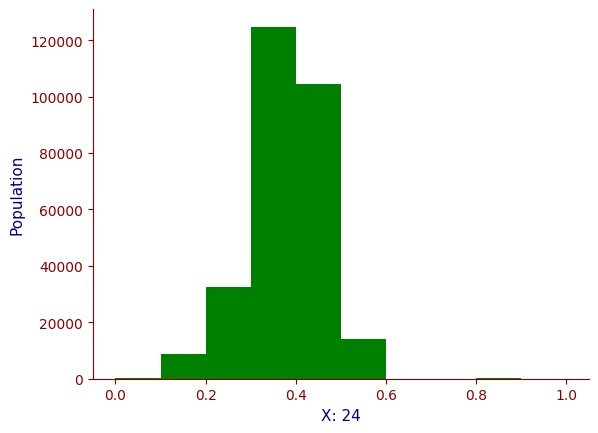

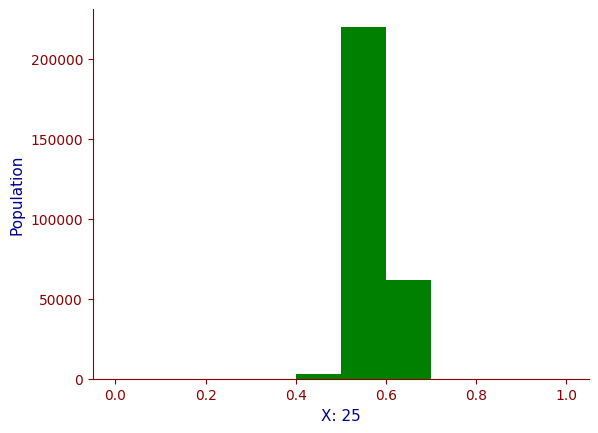

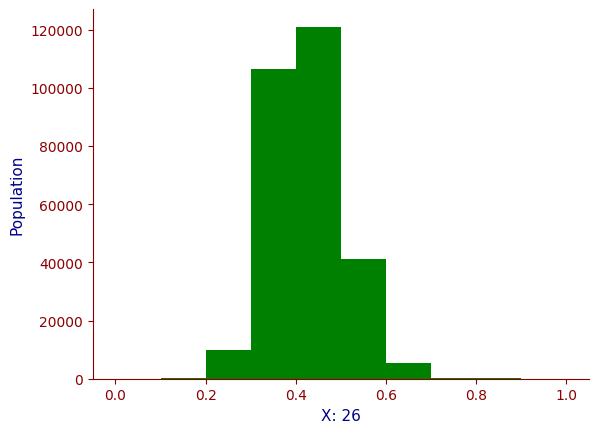

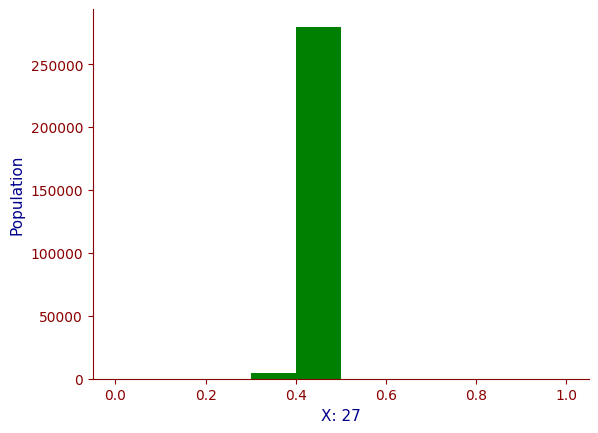

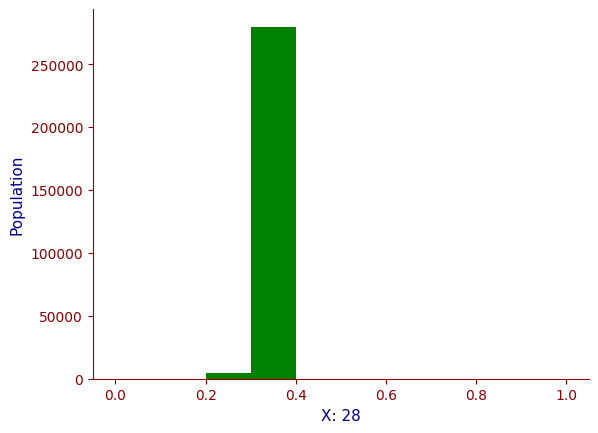

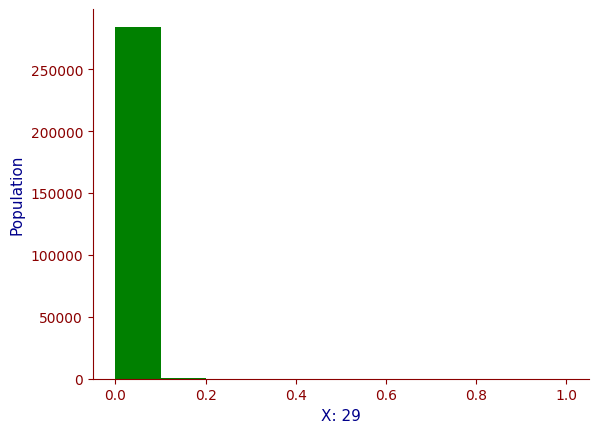

In [14]:
plot_features(X, y)

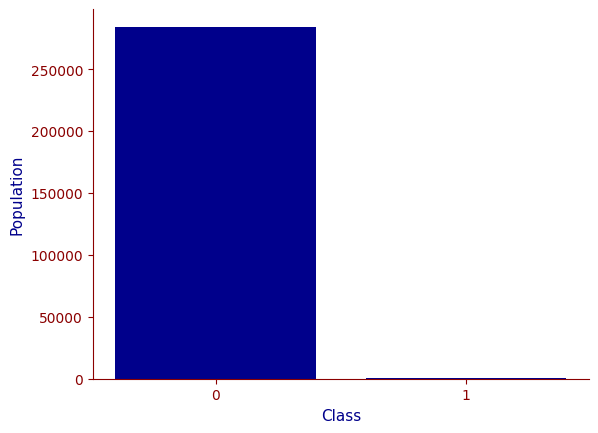

In [15]:
plot_class_dist(y)

In [16]:
X0_train, X0_test, y0_train, y0_test = train_test_split(
    X,
    y,
    test_size=TEST_RATIO,
    random_state=N_SEED,
    shuffle=True,
    stratify=y
)

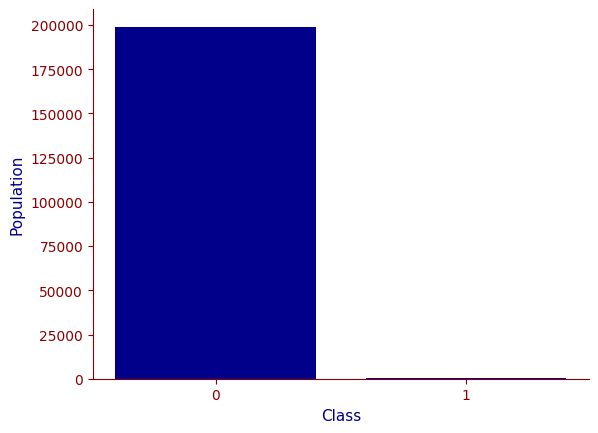

In [17]:
plot_class_dist(y0_train)

## Over Sampling train dataset

In [18]:
smote = SMOTE(
    sampling_strategy="minority",
    k_neighbors=5,
    random_state=N_SEED,
)

# X_train, y_train = smote.fit_resample(X0_train, y0_train)
X_train, y_train = X0_train, y0_train # No over sampling
X_test, y_test = X0_test, y0_test

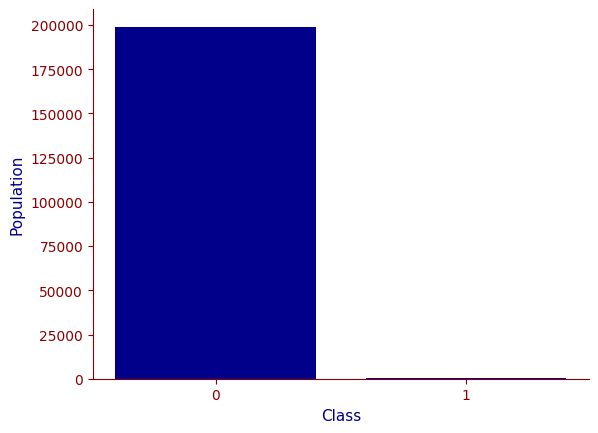

In [19]:
plot_class_dist(y_train)

## Artificial Neural Network

In [20]:
_, input_size = X.shape
print("Input size: {}".format(input_size))
_, output_size = y.shape
print("Output size: {}".format(output_size))

Input size: 30
Output size: 1


In [21]:
BATCH_SIZE = 30
NO_EPOCHS = 100
HIDDEN_SIZE1 = 31
HIDDEN_SIZE2 = 31

In [22]:
input_layer = tf.keras.layers.Input(shape=(input_size,))
output_layer =  tf.keras.layers.Dense(units=output_size, activation="sigmoid")

layers_ANN = [
    input_layer,
    tf.keras.layers.Dense(
        units=HIDDEN_SIZE1,
        activation="relu",
    ),
    tf.keras.layers.Dense(
        units=HIDDEN_SIZE2,
        activation="relu",
    ),
    output_layer,
]

model_ANN = tf.keras.models.Sequential(layers_ANN)

In [23]:
optimizer_ANN = tf.optimizers.SGD(
        learning_rate=0.01,
)

model_ANN.compile(
    optimizer=optimizer_ANN,
    loss=tf.keras.losses.BinaryCrossentropy,
    metrics=[
        tf.keras.metrics.BinaryCrossentropy(),
        tf.keras.metrics.FalseNegatives(),
    ],
)

model_ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 31)             │           961 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 31)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            32 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,985 (7.75 KB)

 Trainable params: 1,985 (7.75 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=VERBOSE,
)

callbacks = [early_stopping]

In [25]:
model_ANN.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=BATCH_SIZE,
    epochs=NO_EPOCHS,
    verbose=VERBOSE,
    callbacks=callbacks,
)

Epoch 1/100
5317/5317 ━━━━━━━━━━━━━━━━━━━━ 3s 458us/step - binary_crossentropy: 0.0366 - false_negatives: 146.2143 - loss: 0.0366 - val_binary_crossentropy: 0.0091 - val_false_negatives: 50.0000 - val_loss: 0.0091
Epoch 2/100
5317/5317 ━━━━━━━━━━━━━━━━━━━━ 2s 384us/step - binary_crossentropy: 0.0122 - false_negatives: 143.6850 - loss: 0.0122 - val_binary_crossentropy: 0.0091 - val_false_negatives: 50.0000 - val_loss: 0.0091
Epoch 3/100
5317/5317 ━━━━━━━━━━━━━━━━━━━━ 2s 381us/step - binary_crossentropy: 0.0128 - false_negatives: 146.9016 - loss: 0.0128 - val_binary_crossentropy: 0.0087 - val_false_negatives: 50.0000 - val_loss: 0.0087
Epoch 4/100
5317/5317 ━━━━━━━━━━━━━━━━━━━━ 2s 359us/step - binary_crossentropy: 0.0117 - false_negatives: 151.3589 - loss: 0.0117 - val_binary_crossentropy: 0.0085 - val_false_negatives: 50.0000 - val_loss: 0.0085
Epoch 5/100
5317/5317 ━━━━━━━━━━━━━━━━━━━━ 2s 390us/step - binary_crossentropy: 0.0126 - false_negatives: 156.0102 - loss: 0.0126 - val_binary_c

In [26]:
y_proba_ANN = model_ANN.predict(X_test)
y_pred_ANN = y_proba_ANN.round()

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 222us/step


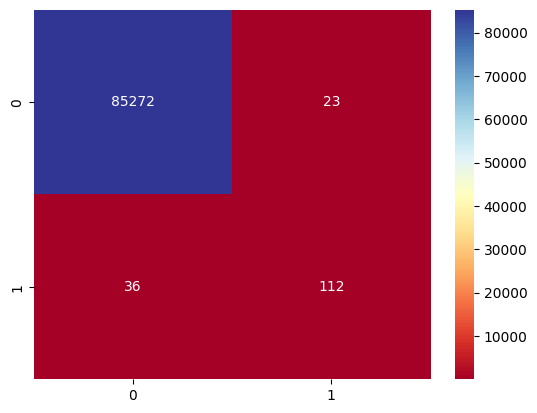

In [27]:
cm_ANN = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_ANN)
sns.heatmap(cm_ANN, annot=True, cmap=COLOR_MAP, fmt=".0f");

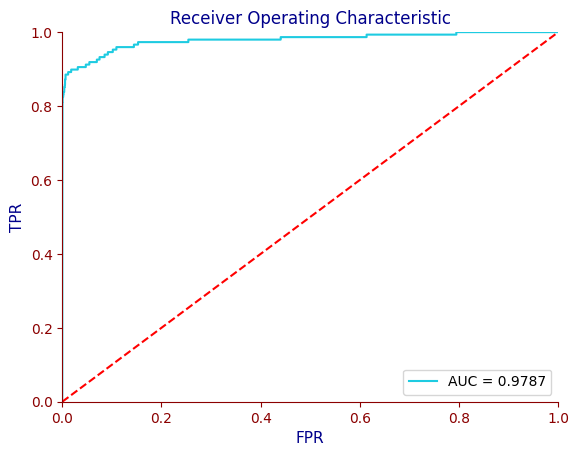

In [28]:
fpr_ANN, tpr_ANN, _ = metrics.roc_curve(y_test, y_proba_ANN)
roc_auc_ANN = metrics.auc(fpr_ANN, tpr_ANN)
plot_roc(fpr_ANN, tpr_ANN, roc_auc_ANN)

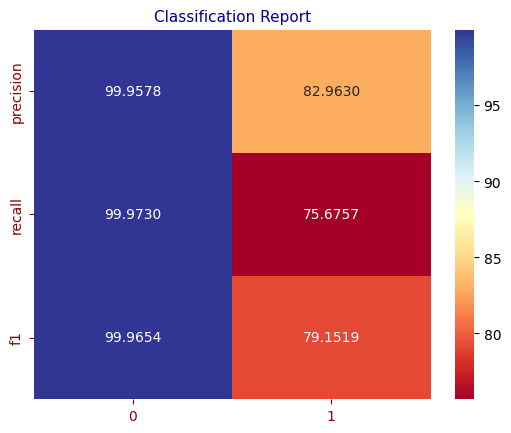

In [29]:
plot_classification(y_true=y_test, y_pred=y_pred_ANN)